### Exploring Data-Driven Solutions in Retail Analytics with Quantium

Welcome to my project with Quantium Data Analytics Virtual Experience Program by Forage. The mission here is to dive deep into transaction and customer data to uncover valuable insights that drive business success. Starting by ensuring data accuracy—checking for errors like missing info or unusual numbers in transactions, and ensuring customer details are complete and ready for merging.

Once the data is cleaned up, combining it provides a full picture of how customers shop. Focus remains on figuring out key facts like total sales, drivers behind those sales, and where most sales occur. Charts and graphs are used to visualize trends and interesting points for inclusion in the report.

The goal is to suggest the best ways to reach different customer groups and improve product offerings, including sizes of items. 

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing transaction file paths

In [42]:
file_path = r"C:\Users\HP\Downloads\QVI_transaction_data.xlsx"
df_tran = pd.read_excel(file_path)
df_tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
file_path_2 = r"C:\Users\HP\Downloads\QVI_purchase_behaviour.csv"
df_purchase_behaviour = pd.read_csv(file_path_2)
df_purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## Merging file paths

In [43]:
df = pd.merge(df_tran, df_purchase_behaviour, how='left', on='LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


## Checking for duplicates and null values 

In [77]:
df.shape

(264836, 10)

In [78]:
df.duplicated().sum()

1

In [79]:
df[df.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


In [80]:
df.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [9]:
df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Converting DATE to date format

In [44]:
df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['DATE'], unit='D')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [45]:
df.iloc[69763]

DATE                             2019-05-20 00:00:00
STORE_NBR                                        226
LYLTY_CARD_NBR                                226000
TXN_ID                                        226210
PROD_NBR                                           4
PROD_NAME           Dorito Corn Chp     Supreme 380g
PROD_QTY                                         200
TOT_SALES                                      650.0
LIFESTAGE                             OLDER FAMILIES
PREMIUM_CUSTOMER                             Premium
Name: 69763, dtype: object

## Examining the formatting of the product name

In [46]:
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [47]:
# Replacing & with and and removing extra spaces 
df['PROD_NAME']=df['PROD_NAME'].str.replace('&', 'and')
df['PROD_NAME']=df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True)

In [48]:
def remove_special_characters(text):
    import re  # Import re module here
    # Using regex to replace digits and special characters with ''
    return re.sub(r'[^A-Za-z\s]', '', text)

##  Cleaning brand names

In [49]:
def replace_brands(text):
    replacements = {
        'RRD': 'Red Rock Deli',
        'Snbts': 'Sunbites',
        'GrnWves': 'Grain Wave',
        'Infzns': 'Infuzions',
        'WW': 'Woolworths',
        'NCC': 'Natural ChipCo'
    }
    # Iterate over the replacements and apply them to the text
    for abbreviation, full_name in replacements.items():
        text = text.replace(abbreviation, full_name)
    return text
df['PROD_NAME']= df['PROD_NAME'].apply(replace_brands)

Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.


## Identifying chips only products

In [50]:
mask = df['PROD_NAME'].str.contains('salsa', case=False)

# Invert the mask to filter out rows that contain "salsa"
chips = df[~mask]

# Reset index after dropping rows

chips.reset_index(drop=True, inplace=True)

In [51]:
df['PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt175g', 'CCs Nacho Cheese 175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/CreamandOnion 175g',
       'Kettle Tortilla ChpsHnyandJlpno Chili 150g',
       'Old El Paso Salsa Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt and Vinegar 330g',
       'Grain Waves Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour CreamandChives 210G',
       'Kettle Sensations Siracha Lime 150g', 'Twisties Cheese 270g',
       'Woolworths Crinkle Cut Chicken 175g',
       'Thins Chips Lightand Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g',
       'Natural ChipCo Sour Cream and Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle Original 330g',
       'Infuzions Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt And Vinegar 175g',
       'Smiths Chip Thinly Cut Original 175g', 'Kettle Original 1

## Separating columns for the chip packet's name and its size

In [52]:
# Apply the function to the 'text' column
df['PACK_NAME'] = df['PROD_NAME'].apply(remove_special_characters)

def remove_last_character(text):
    return text[:-1]
df['PACK_NAME'] = df['PACK_NAME'].apply(remove_last_character)
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamandOnion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly SCreamandOnion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyandJlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHnyandJlpno Chili
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno


In [53]:
def extract_numbers(text):
    numbers = ''.join(filter(str.isdigit, text))
    return numbers


# Apply the filter function to the 'text' column
df['PACK_SIZE'] = df['PROD_NAME'].apply(extract_numbers)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamandOnion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly SCreamandOnion,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyandJlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHnyandJlpno Chili,150


## checking the missing date

In [54]:
delete = chips[chips["LYLTY_CARD_NBR"] == 226000].index
df.drop(index=delete, inplace=True)

In [55]:
df.sort_values(by="PROD_QTY", ascending= False)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamandOnion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly SCreamandOnion,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyandJlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHnyandJlpno Chili,150


In [99]:
df["DATE"].nunique()

364

There's only 364 rows, meaning only 364 dates which indicates a missing date. 

In [56]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
date_df = pd.DataFrame(date_range, columns=['DATE'])
merged_df = pd.merge(date_df, chips, on='DATE', how='left')
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil and Pesto 175g,2.0,10.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Lightand Tangy 175g,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
246738,2019-06-30,242.0,242159.0,246222.0,36.0,Kettle Chilli 175g,2.0,10.8,YOUNG SINGLES/COUPLES,Premium
246739,2019-06-30,244.0,244213.0,247339.0,93.0,Doritos Corn Chip Southern Chicken 150g,2.0,7.8,YOUNG SINGLES/COUPLES,Premium
246740,2019-06-30,256.0,256018.0,255130.0,105.0,Woolworths Cheese Rings 190g,2.0,3.6,YOUNG SINGLES/COUPLES,Premium
246741,2019-06-30,257.0,257079.0,256218.0,71.0,Twisties Cheese Burger 250g,2.0,8.6,YOUNG SINGLES/COUPLES,Premium


C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


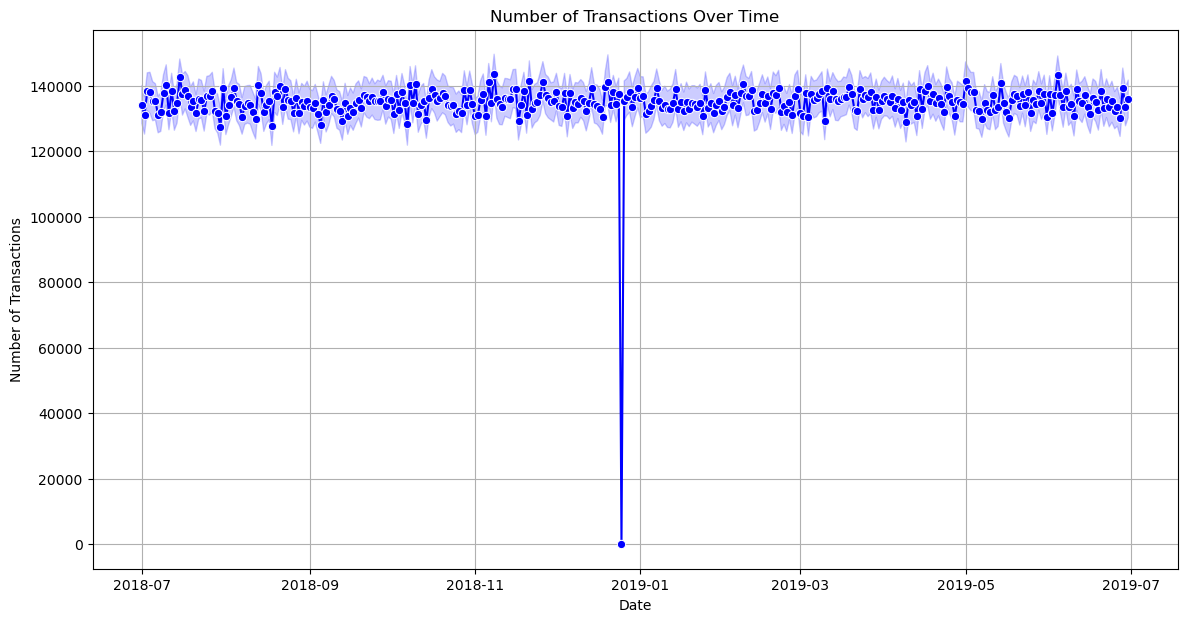

In [101]:
date_df = pd.DataFrame(date_range, columns=['DATE'])
merged_df = pd.merge(date_df, chips, on='DATE', how='left')
merged_df['TXN_ID'].fillna(0, inplace=True)
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='DATE', y='TXN_ID', marker='o', color='b')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.


## Checking transaction pack size

In [57]:
df_sorted = df.sort_values(by='PROD_QTY', ascending=False)
df_sorted.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_NAME,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme,380
55595,2018-08-20,208,208118,206784,90,Tostitos Smoked Chipotle 175g,5,22.0,OLDER FAMILIES,Mainstream,Tostitos Smoked Chipotle,175
238333,2018-08-14,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5,YOUNG SINGLES/COUPLES,Mainstream,Pringles SourCream Onion,134
238471,2019-05-19,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0,YOUNG SINGLES/COUPLES,Mainstream,Infuzions BBQ Rib Prawn Crackers,110


Let's investigate further the case where 200 packets of chips are bought in one transaction.


C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


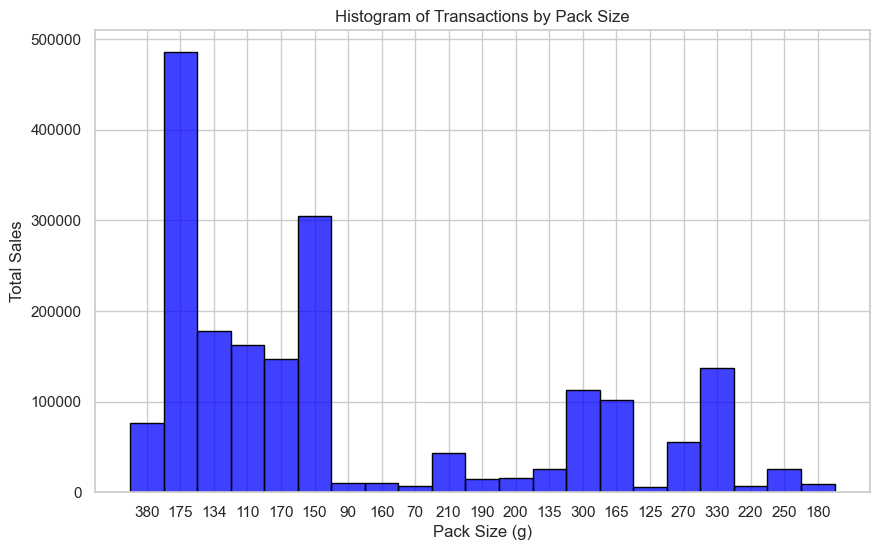

In [58]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df_sorted, x='PACK_SIZE', weights='TOT_SALES', bins=100, color='blue', edgecolor='black')
plt.title('Histogram of Transactions by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer. It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [59]:
df = df.drop(index=69762)

In [60]:
df = df.drop(index=69763)

## Checking who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

### Question 1- Do customers typically buy more chips products compared to other customer segments?

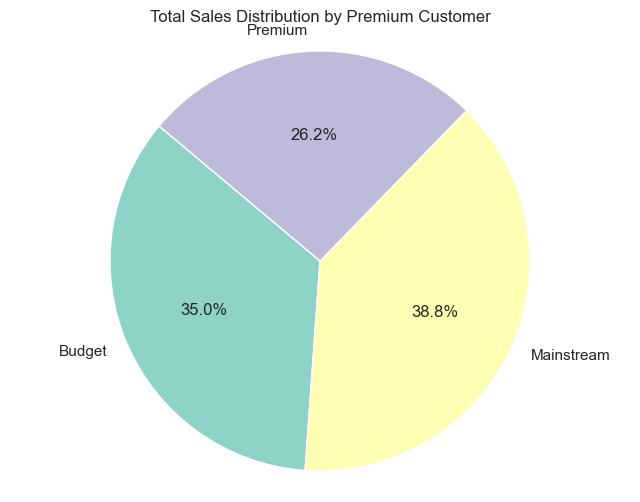

In [61]:
# Grouping by PREMIUM_CUSTOMER and summing TOT_SALES
group_1 = df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().reset_index()

# Plotting total sales by PREMIUM_CUSTOMER as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(group_1['TOT_SALES'], labels=group_1['PREMIUM_CUSTOMER'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Total Sales Distribution by Premium Customer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Mainstream customers generally purchase more chips products compared to any other customer segment. Let's explore this further.

### Question 2- Do customers typically buy more chips products according to their lifestage?

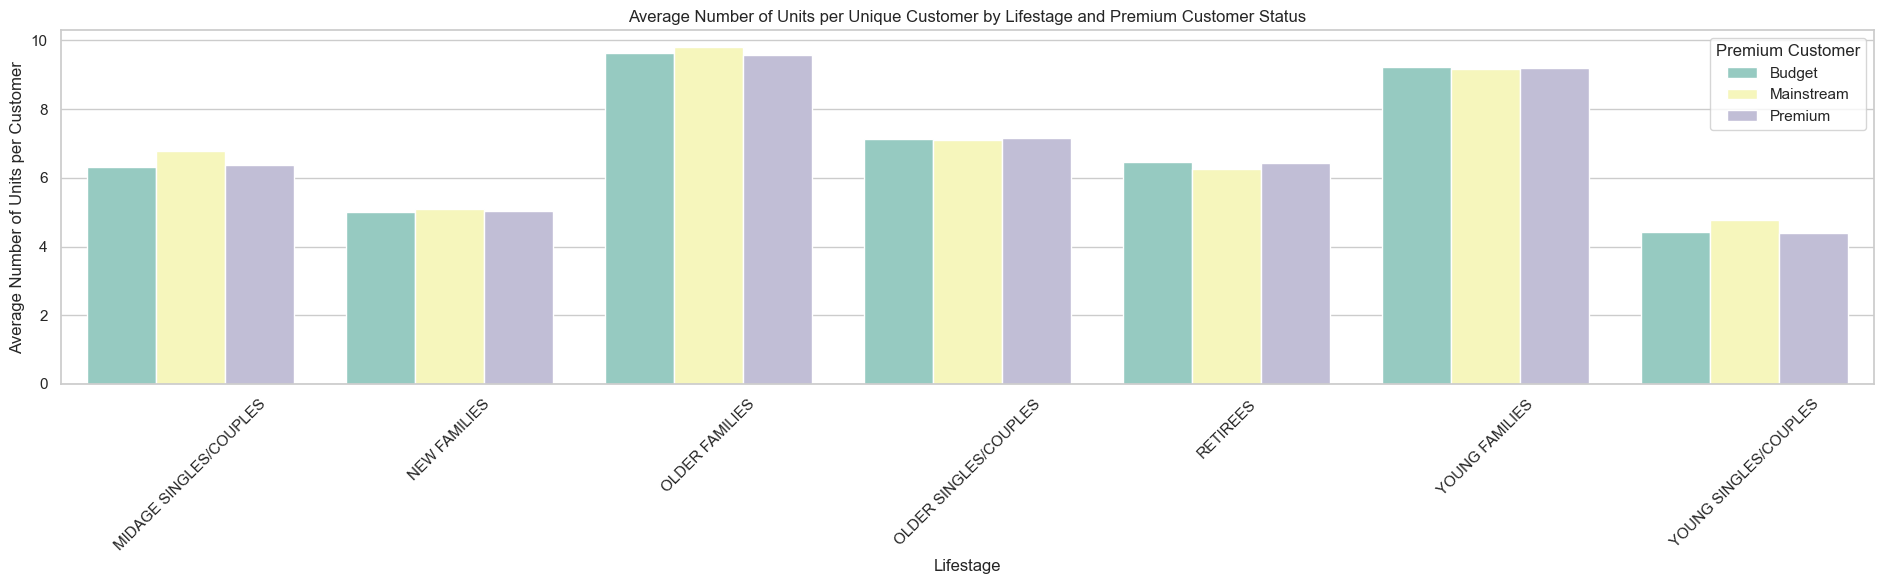

In [67]:
group_2 = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg( 
    total_units=('PROD_QTY', 'sum'),unique_customers=('LYLTY_CARD_NBR', 'nunique')
).reset_index()
group_2['avg_units_per_customer'] = group_2['total_units'] / group_2['unique_customers']
sns.set(style="whitegrid")
plt.figure(figsize=(19, 6))
bar_plot = sns.barplot(x='LIFESTAGE', y='avg_units_per_customer', hue='PREMIUM_CUSTOMER', data=group_2, palette='Set3')
bar_plot.set_title('Average Number of Units per Unique Customer by Lifestage and Premium Customer Status')
bar_plot.set_xlabel('Lifestage')
bar_plot.set_ylabel('Average Number of Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer

### Question 3- From which customer segment does the majority of sales come?

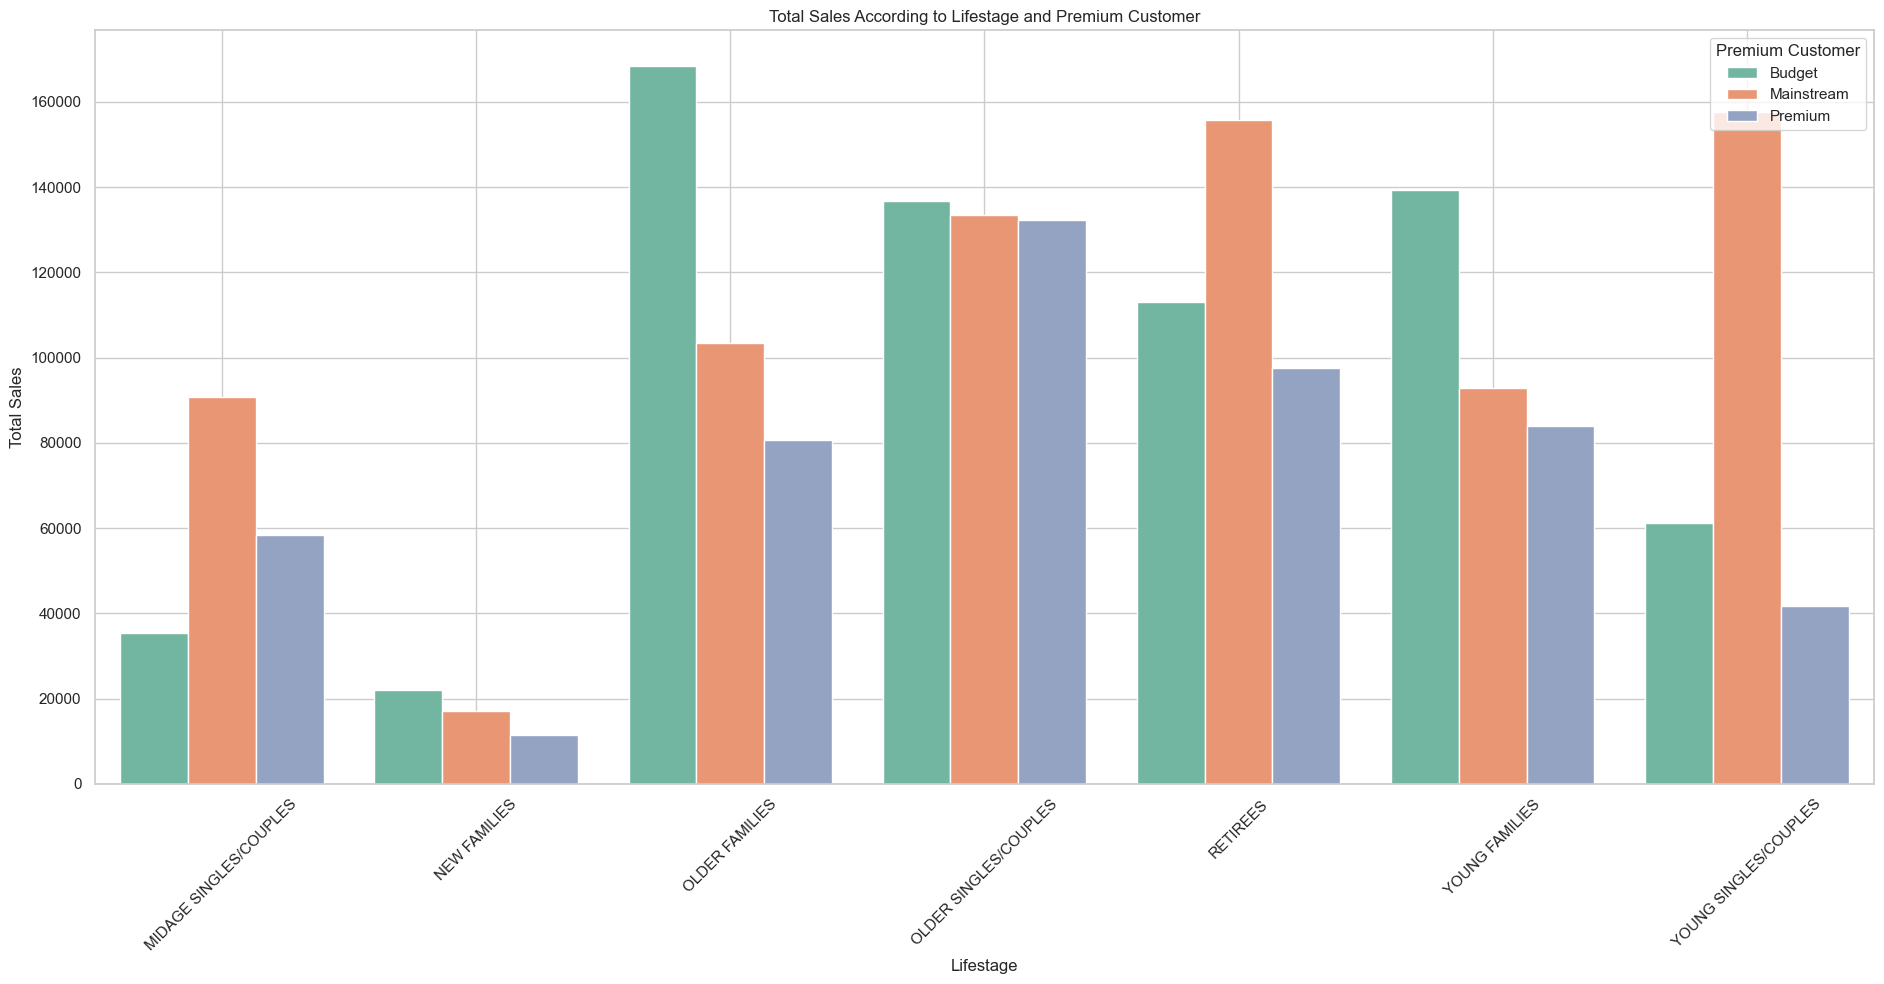

In [64]:
group_3 = df.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])["TOT_SALES"].sum().reset_index()

# Plotting total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(19, 10))
sns.barplot(data=group_3, x="LIFESTAGE", y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='Set2')
plt.title('Total Sales According to Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Premium Customer', loc='upper right')  # Adjust legend position if necessary
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The majority of sales come from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees. Let's examine whether higher sales correlate with a larger customer base purchasing chips.

### Further analysis..

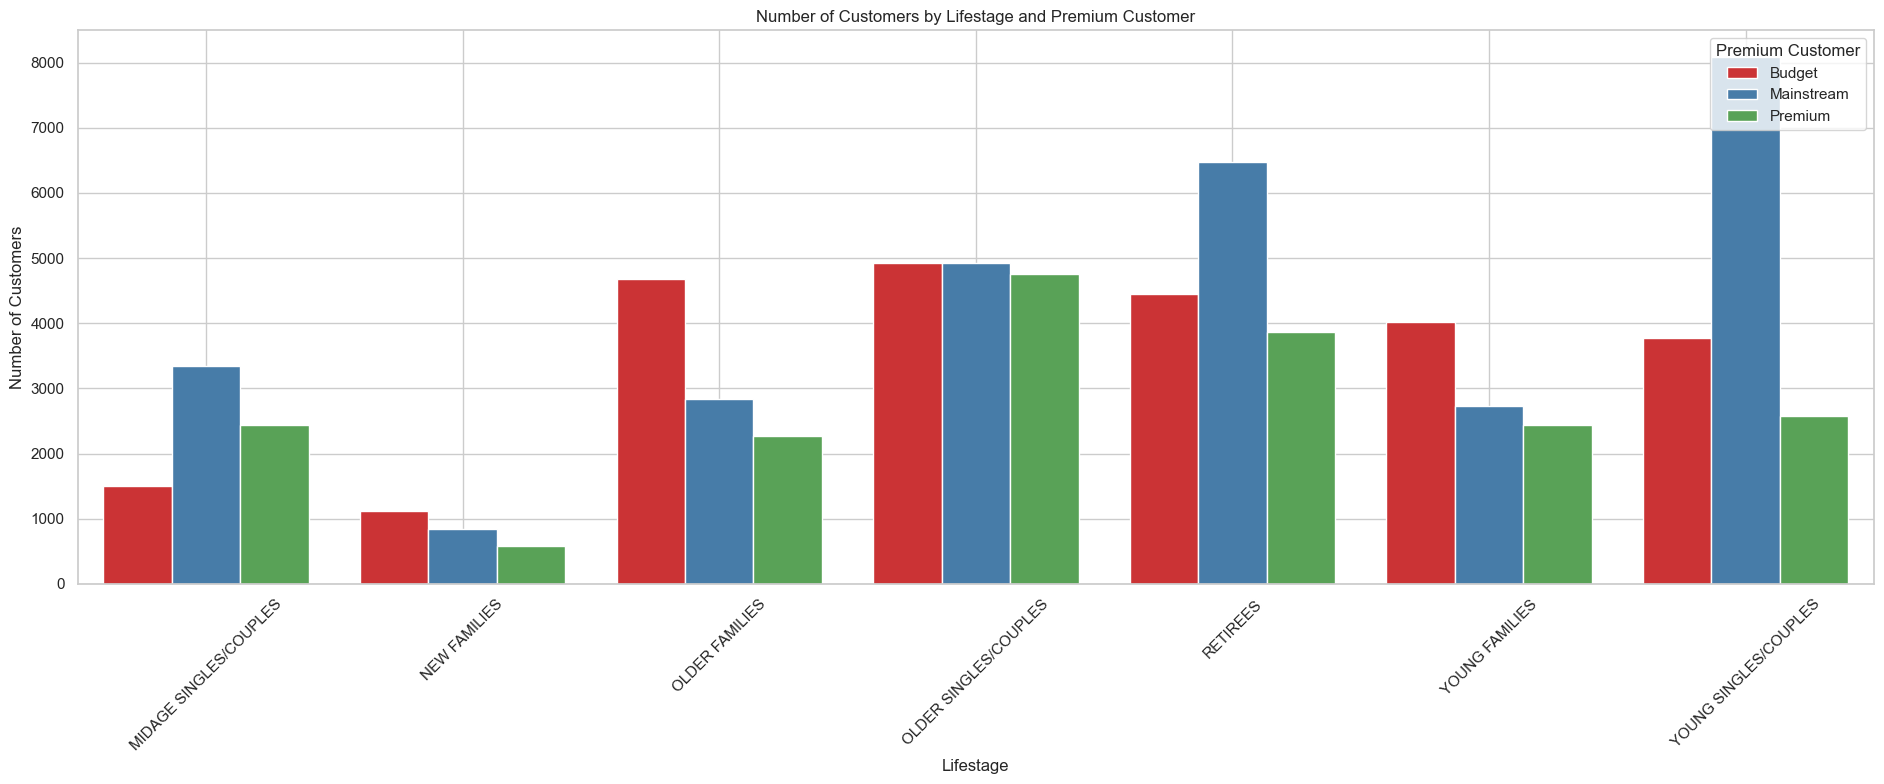

In [68]:
group_3=df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().reset_index()
# Plotting number of unique customers by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(19, 8))
sns.barplot(data=group_3, x="LIFESTAGE", y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', palette='Set1')
plt.title('Number of Customers by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Premium Customer', loc='upper right')  # Adjust legend position if necessary
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

More Mainstream - young singles/couples and Mainstream - retirees purchase chips, which contributes to higher sales in these customer segments. However, this trend is not a significant factor for the Budget - Older families segment. Higher sales may also be influenced by the number of chip units purchased per customer. Let's investigate this aspect next.

### Question 4- Based on customer segment, who shows a greater willingness to pay more for the same size?

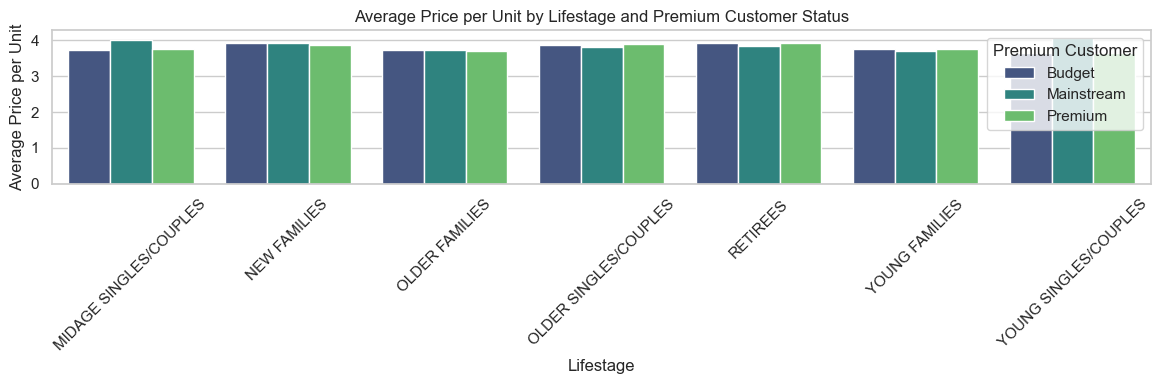

In [31]:
df["UNIT_PRICE"]=df["TOT_SALES"]/df["PROD_QTY"]
grouped_avg_price = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_unit_price=('UNIT_PRICE', 'mean')
).reset_index()

# Plotting the average unit price by LIFESTAGE and PREMIUM_CUSTOMER
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(x='LIFESTAGE', y='avg_unit_price', hue='PREMIUM_CUSTOMER', data=grouped_avg_price, palette='viridis')

# Customize the plot with titles and labels
bar_plot.set_title('Average Price per Unit by Lifestage and Premium Customer Status')
bar_plot.set_xlabel('Lifestage')
bar_plot.set_ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')

# Display the plot
plt.tight_layout()
plt.show()

Mainstream mid-age and young singles and couples exhibit a greater willingness to spend more per packet of chips compared to their budget and premium counterparts. This trend may stem from premium shoppers' inclination towards healthier snack choices, where chips are primarily purchased for entertainment rather than personal consumption. Additionally, the lower frequency of chip purchases among premium mid-age and young singles and couples compared to their mainstream counterparts supports this observation.

## Let's conduct statistical test to determine if the average price per unit difference 

In [134]:
from scipy.stats import ttest_ind


In [138]:
# Filter data for the two groups
mainstream = df[df['PREMIUM_CUSTOMER'] == 'Mainstream']['UNIT_PRICE']
midage = df[df['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget']) & (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]['UNIT_PRICE']

# Perform t-test
t_statistic, p_value = ttest_ind(mainstream, midage, equal_var=False)  # assuming unequal variances

# Print results
print(f"T-Test Results for Mainstream vs Premium and Budget Midage:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Test Results for Mainstream vs Premium and Budget Midage:
T-Statistic: 11.95050243179576
P-Value: 8.782461107968595e-33


The extremely low p-value (close to zero) indicates strong evidence against the null hypothesis. In practical terms, this means that the average unit price for mainstream customers is significantly different from that of premium and budget midage customers.

In [141]:
# Filter data for the two groups
young_singles_couples = df[df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES'])]['UNIT_PRICE']
another_group = df[df['PREMIUM_CUSTOMER'] == 'Mainstream']['UNIT_PRICE']  # Example: Mainstream as another group

# Perform t-test
t_statistic, p_value = ttest_ind(young_singles_couples, another_group, equal_var=False)  # assuming unequal variances

# Print results
print(f"T-Test Results for Young Singles and Couples vs Another Group (e.g., Mainstream):")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Test Results for Young Singles and Couples vs Another Group (e.g., Mainstream):
T-Statistic: 3.056956009579918
P-Value: 0.002236890861010848


Here, the p-value (0.00224) is less than the typical significance level of 0.05, indicating that there is strong evidence to reject the null hypothesis. Therefore, the average unit price for young singles and couples is significantly different from that of the comparison group (e.g., mainstream customers).

### Conclusion:
For Mainstream vs Premium and Budget Midage:

The unit price for mainstream customers is significantly higher than that of premium and budget midage customers.
For Young Singles and Couples vs Another Group:

The unit price for young singles and couples is significantly different from that of the comparison group (e.g., mainstream customers).
These conclusions are drawn based on the statistical significance indicated by the low p-values obtained from the independent t-tests. The low p-values suggest that the differences in average unit prices between the specified customer segments are unlikely to be due to random chance, thereby supporting the alternative hypothesis that there are significant differences between these groups.